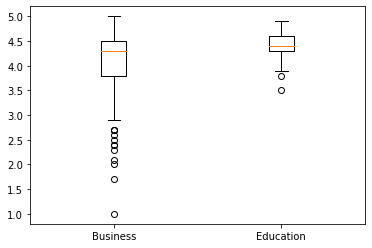

In [190]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb

#PREPROCESSING
#part1
dataset = pd.read_excel("GooglePlaystore.xlsx")
dataset = dataset[dataset.Reviews != '3.0M']
#dataset.loc[lambda dataset: dataset['App'] == 'Life Made WI-Fi Touchscreen Photo Frame']


#part2
dataset = dataset[dataset['Size'] != 'Varies with device']
dataset = dataset[dataset['Current Ver'] != 'Varies with device']
dataset = dataset[dataset['Android Ver'] != 'Varies with device']
#dataset.loc[lambda dataset: dataset['App'] == 'Quick PDF Scanner + OCR FREE']

#part3
dataset['Android Ver'] = dataset['Android Ver'].str.extract('^(\d+\.\d+)')


#part4
dataset['Installs'] = dataset['Installs'].replace({'\+': '', ',': ''}, regex=True)
dataset[dataset['Installs'].apply(lambda x: str(x).isdigit())]

#part5nottttt doneeeee
ratingValuesRange = dataset[ (dataset['Rating'].isnull()) & (dataset['Reviews'] < 100) & (dataset['Installs'].astype(int) < 50000)].index
dataset.drop(ratingValuesRange , inplace=True)
#dataset.loc[lambda dataset: dataset['App'] == 'Secrets of beauty, youth and health']

#dataset.loc[((dataset['Rating'].isnull()) & (dataset['Reviews'] >= 100)), ['Rating']] = dataset['Rating'].mean()

#dataset.loc[lambda dataset: dataset['App'] == 'Mcqueen Coloring pages']


#part6
repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9', }
dataset['Size'] = dataset['Size'].replace(repl_dict, regex=True).map(pd.eval)
dataset['Size'] = dataset['Size'].astype(int)
#dataset







#ratingValuesMeanIndex = dataset[ (dataset['Rating'].isnull()) & (dataset['Reviews'] >= 100) & (dataset['Installs'].astype(int) >= 50000)].index
#dataset.drop(ratingValuesMeanIndex , inplace=True)
#dataset


#Analysis
#part1
dataset.groupby('Category')['Rating'].describe()

#part2
def get_top_3(df, colName):
    newdf = df.copy()
    newdf[colName] = pd.to_numeric(newdf[colName], errors='coerce')
    topThree = newdf.nlargest(3, [colName])
    return topThree[['App','Category',colName]]

garating_df = get_top_3(dataset[dataset['Type'] == 'Free'], 'Rating')
gainstalls_df = get_top_3(dataset[dataset['Type'] == 'Free'], 'Installs')
gareviews_df = get_top_3(dataset[dataset['Type'] == 'Free'], 'Reviews')
#garating_df
#gainstalls_df
#gareviews_df

#part3
dataset['Price'] = dataset['Price'].replace({'$': ''}, regex=True)
#dataset.loc[lambda dataset: dataset['App'] == 'TurboScan: scan documents and receipts in PDF']
dataset.loc[lambda dataset: dataset['Type'] == 'Paid'].describe()


#visualization
#part1
arr = dataset["Genres"].str.split(';').tolist()
flat_list = [item for sublist in arr for item in sublist]
#flat_list
#unique_arr = [*set(flat_list)]
#unique_arr

word_count = pd.value_counts(np.array(flat_list))
#word_count.plot(kind='pie')

#part2
businessList = dataset.loc[lambda dataset: dataset['Category'] == 'BUSINESS']
businessListClean = businessList.dropna(subset='Rating')
#df2=df.dropna(subset=['Courses','Fee'])
#bus = businessListClean.remove(nan)
businessRatingList = businessListClean['Rating'].to_list()
#businessListClean.loc[lambda dataset: dataset['App'] == 'Y! Mobile menu']


#educationList = dataset.loc[lambda dataset: dataset['Category'] == 'EDUCATION']
#educationRatingList = businessList['Rating'].to_list()
#edu = list(map(int, educationRatingList))
#bus

educationList = dataset.loc[lambda dataset: dataset['Category'] == 'EDUCATION']
educationListClean = educationList.dropna(subset='Rating')
educationRatingList = educationListClean['Rating'].to_list()

plt.boxplot([businessRatingList, educationRatingList],labels=('Business','Education'))
plt.show()
